In [1]:
from sklearn.model_selection import KFold
import pandas as pd
import sklearn.metrics
import autosklearn.classification
import autosklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns


/home/wl/anaconda3/lib/python3.7/site-packages/pyparsing.py:2725: FutureWarning: Possible set intersection at position 3
  self.re = re.compile( self.reString )


In [2]:
df_clean = pd.read_csv('noshowappointments-kagglev2-may-2016_clean.csv')
print(df_clean.head(3))


         PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0   29872499824296        5642903      F   2016-04-29     2016-04-29   62   
1  558997776694438        5642503      M   2016-04-29     2016-04-29   56   
2    4262962299951        5642549      F   2016-04-29     2016-04-29   62   

     Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
0  JARDIM DA PENHA            0             1         0           0         0   
1  JARDIM DA PENHA            0             0         0           0         0   
2    MATA DA PRAIA            0             0         0           0         0   

   SMS_received  No-show  Handicap_Y/N           Age_Cate ScheduledTime  \
0             0    False             0  Mid Aged: 41 - 65      18:38:08   
1             0    False             0  Mid Aged: 41 - 65      16:08:27   
2             0    False             0  Mid Aged: 41 - 65      16:19:04   

   WaitDays     WaitCate  
0         0  Same Day: 0  
1         0

In [3]:
kept_columns = ['Scholarship', 'Diabetes', 'Alcoholism', 'SMS_received', 'WaitDays', 'Age']
df_features = df_clean[kept_columns].copy()
print(df_features.head())


   Scholarship  Diabetes  Alcoholism  SMS_received  WaitDays  Age
0            0         0           0             0         0   62
1            0         0           0             0         0   56
2            0         0           0             0         0   62
3            0         0           0             0         0    8
4            0         1           0             0         0   56


In [4]:
df_labels = df_clean['No-show'].map({True:1, False:0}).copy()
df_labels.head()


0    0
1    0
2    0
3    0
4    0
Name: No-show, dtype: int64

In [5]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(df_features):
    features_train, features_test = df_features.loc[train_index], df_features.loc[test_index]
    labels_train, labels_test = df_labels.loc[train_index], df_labels.loc[test_index]


In [6]:
automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(features_train, labels_train)
pred = automl.predict(features_test)


/home/wl/anaconda3/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/wl/anaconda3/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/wl/anaconda3/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/wl/anaconda3/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/wl/anaconda3/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/wl/anaconda3/lib/python3.7/site-packages/autosklearn/evaluation/train

[WARNING] [2019-03-23 12:46:02,113:EnsembleBuilder(1):4eba876642ee281062642cdfbc113658] No models better than random - using Dummy Score!
[WARNING] [2019-03-23 12:46:02,191:EnsembleBuilder(1):4eba876642ee281062642cdfbc113658] No models better than random - using Dummy Score!
[WARNING] [2019-03-23 12:46:04,198:EnsembleBuilder(1):4eba876642ee281062642cdfbc113658] No models better than random - using Dummy Score!
[WARNING] [2019-03-23 12:46:06,207:EnsembleBuilder(1):4eba876642ee281062642cdfbc113658] No models better than random - using Dummy Score!
[WARNING] [2019-03-23 12:46:08,212:EnsembleBuilder(1):4eba876642ee281062642cdfbc113658] No models better than random - using Dummy Score!
[WARNING] [2019-03-23 12:46:10,219:EnsembleBuilder(1):4eba876642ee281062642cdfbc113658] No models better than random - using Dummy Score!
[WARNING] [2019-03-23 12:46:12,225:EnsembleBuilder(1):4eba876642ee281062642cdfbc113658] No models better than random - using Dummy Score!
[WARNING] [2019-03-23 12:46:14,235

In [7]:
# Scores
print("Accuracy score:{}".format(sklearn.metrics.accuracy_score(labels_test, pred)))
print("Precision:{}".format(autosklearn.metrics.precision(labels_test, pred)))
print("Recall:{}".format(autosklearn.metrics.recall(labels_test, pred)))
print("F1 Score:{}".format(sklearn.metrics.f1_score(labels_test, pred)))


Accuracy score:0.7922791592251683
Precision:0.47619047619047616
Recall:0.004411116012351125
F1 Score:0.008741258741258742


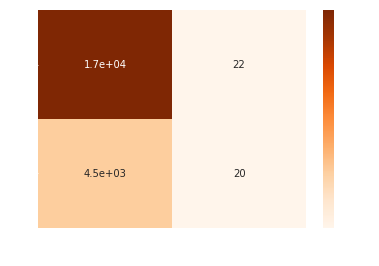

In [8]:
# visualizing confusion matrics
confusion_matrix_automl = sklearn.metrics.confusion_matrix(labels_test, pred)
sns.heatmap(confusion_matrix_automl, annot=True, cmap="Oranges")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [9]:
automl.show_models()



"[(0.280000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'one_hot_encoding', 'classifier:__choice__': 'gradient_boosting', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'robust_scaler', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True', 'classifier:gradient_boosting:criterion': 'mse', 'classifier:gradient_boosting:learning_rate': 0.13353350548741874, 'classifier:gradient_boosting:loss': 'deviance', 'classifier:gradient_boosting:max_depth': 2, 'classifier:gradient_boosting:max_features': 0.9437475476710979, 'classifier:gradient_boosting:max_leaf_nodes': 'None', 'classifier:gradient_boosting:min_impurity_decrease': 0.0, 'classifier:gradient_boosting:min_samples_leaf': 15, 'classifier:gradient_boosting:min_samples_split': 7, 'classifier:gradient_boosting:min_weight_fraction_leaf': 0.0, 'classifier:gradient_boosting:n_estimators': 372, 'classifier:gradient_boosting:

In [10]:
# auto-sklearn statistics
automl.sprint_statistics()



'auto-sklearn results:\n  Dataset name: 4eba876642ee281062642cdfbc113658\n  Metric: accuracy\n  Best validation score: 0.802227\n  Number of target algorithm runs: 160\n  Number of successful target algorithm runs: 151\n  Number of crashed target algorithm runs: 2\n  Number of target algorithms that exceeded the time limit: 7\n  Number of target algorithms that exceeded the memory limit: 0\n'